In [1]:
import pandas as pd
data=pd.read_csv("/content/Hamspam.csv",encoding="ISO-8859-1")

In [2]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


## Perprocessing data

### Data Cleaning

In [5]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [6]:
data['text'] = data.text.apply(clean)
data.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [7]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

to      2243
i       2228
you     2118
a       1437
the     1323
u       1298
and      965
is       892
in       886
me       789
my       753
for      709
your     659
of       619
it       616
call     577
have     575
on       534
that     509
are      490
dtype: int64

Here we got high frequency of stop words so remove stop words

In [8]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

u       1298
call     577
im       462
ur       389
get      384
å£       293
dont     287
go       282
ok       278
free     275
know     257
like     244
ill      239
got      239
good     236
come     228
time     214
day      203
love     197
send     191
dtype: int64

In [10]:
#Removeing remaining stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
 
stop=stopwords.words('english')
stop.append('u')
stop.append('call')
stop.append('im')
stop.append('ur')
stop.append('get')
stop.append('å£')
stop.append('dont')
stop.append('go')
stop.append('free')
stop.append('ok')
stop.append('know')
stop.append('like')
stop.append('ill')
stop.append('got')
stop.append('good')
stop.append('time')
stop.append('day')
stop.append('love')
stop.append('send')

data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(data[0:40])

    type                                               text
0    ham                                 hope week checking
1    ham                                  kgive back thanks
2    ham                                       also cbe pay
3   spam  complimentary star ibiza holiday cash needs ur...
4   spam  okmail dear dave final notice collect tenerife...
5    ham                        aiya discuss later lar pick
6    ham                                          much buzy
7    ham                            please ask mummy father
8   spam  marvel mobile play official ultimate spiderman...
9    ham                        fyi usf swing room whenever
10   ham  sure thing big man hockey elections shouldnââ...
11   ham                                       anything lor
12   ham  march ending ready sure problem capital never ...
13   ham                               hmm well night night
14   ham                              k sure noon see whats
15   ham                    ha ha cool c

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

come      228
want      190
text      188
one       171
going     170
need      166
txt       163
home      162
lor       160
see       157
sorry     156
still     154
r         153
back      152
stop      152
n         145
reply     144
today     141
mobile    138
tell      137
dtype: int64

In [12]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,1,0.000089
1,aah,3,0.000266
2,aaniye,1,0.000089
3,aaooooright,1,0.000089
4,aathilove,3,0.000266
5,aathiwhere,3,0.000266
6,ab,1,0.000089
7,abbey,1,0.000089
8,abdomen,1,0.000089
9,abeg,1,0.000089


In [14]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N-gram

In [16]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [17]:
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,sorry later,38
1,po box,28
2,take care,27
3,new year,23
4,prize guaranteed,22


[Text(0, 0, 'sorry later'),
 Text(0, 0, 'po box'),
 Text(0, 0, 'take care'),
 Text(0, 0, 'new year'),
 Text(0, 0, 'prize guaranteed'),
 Text(0, 0, 'every week'),
 Text(0, 0, 'hi hi'),
 Text(0, 0, 'selected receive'),
 Text(0, 0, 'await collection'),
 Text(0, 0, 'happy new'),
 Text(0, 0, 'customer service'),
 Text(0, 0, 'urgent mobile'),
 Text(0, 0, 'land line'),
 Text(0, 0, 'last night'),
 Text(0, 0, 'chance win'),
 Text(0, 0, 'prize claim'),
 Text(0, 0, 'private account'),
 Text(0, 0, 'account statement'),
 Text(0, 0, 'shows unredeemed'),
 Text(0, 0, 'guaranteed land')]

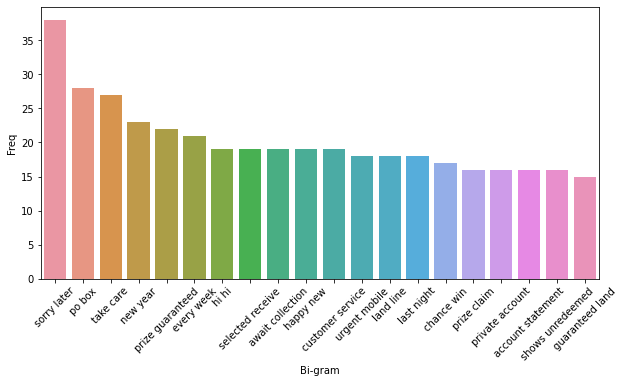

In [18]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [19]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [20]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [21]:
top3_df

,Tri-gram,Freq
0,happy new year,18
1,private account statement,16
2,prize guaranteed land,15
3,guaranteed land line,15
4,land line claim,14
...,...,...
195,chance win cash,5
196,double mins txts,5
197,winner specially selected,5
198,selected receive cash,5


[Text(0, 0, 'happy new year'),
 Text(0, 0, 'private account statement'),
 Text(0, 0, 'prize guaranteed land'),
 Text(0, 0, 'guaranteed land line'),
 Text(0, 0, 'land line claim'),
 Text(0, 0, 'draw shows prize'),
 Text(0, 0, 'shows prize guaranteed'),
 Text(0, 0, 'identifier code expires'),
 Text(0, 0, 'account statement shows'),
 Text(0, 0, 'statement shows unredeemed'),
 Text(0, 0, 'cant pick phone'),
 Text(0, 0, 'pick phone right'),
 Text(0, 0, 'phone right pls'),
 Text(0, 0, 'right pls message'),
 Text(0, 0, 'hi hi hi'),
 Text(0, 0, 'bonus caller prize'),
 Text(0, 0, 'every week txt'),
 Text(0, 0, 'points identifier code'),
 Text(0, 0, 'urgent trying contact'),
 Text(0, 0, 'line claim valid')]

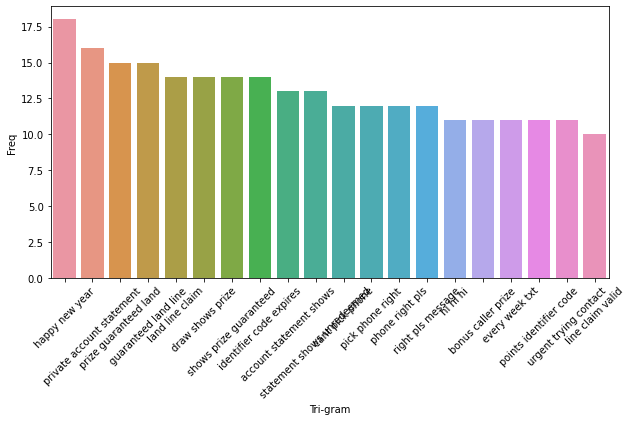

In [22]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

## WordCloud

In [23]:
string_Total = " ".join(data["text"])

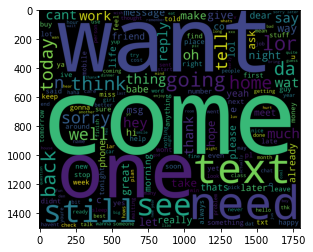

In [24]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

In [25]:
data.head()

,type,text
0,ham,hope week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday cash needs ur...
4,spam,okmail dear dave final notice collect tenerife...


In [26]:
def split_into_words(i):
    return (i.split(" "))

In [27]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [28]:
email_test

,type,text
1401,ham,gonna home soon want talk stuff anymore tonigh...
83,ham,nope since ayo travelled forgotten guy
4767,ham,chance plz
3649,ham,tell bad character dnt lik try change add tat ...
5085,spam,loans purpose even bad credit tenants welcome ...
...,...,...
4765,ham,buy pizza meat lovers supreme pick
5398,ham,x course messages messenger lik r sending
26,ham,well desperate armand
2706,spam,tried contact reply offer video handset anytim...


In [29]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

In [30]:
# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    

In [31]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 8156)

In [32]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(1668, 8156)

In [33]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) #  0.9910048830634798

print("accuracy_train_m = ",accuracy_train_m)

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 0.9592326139088729

print("accuracy_test_m= ",accuracy_test_m)

accuracy_train_m =  0.9912618864045233
accuracy_test_m=  0.9652278177458034


In [34]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 8%

## Using TFIDF

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)

(1668, 8156)

In [36]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%

In [37]:
accuracy_train_m

0.9717296324852223

In [38]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [39]:
accuracy_test_g

0.8932853717026379